# PRÁTICA GUIADA: Validação de modelos. 

#### Estudaremos um exemplo de uso da [validação cruzada](https://towardsdatascience.com/cross-validation-430d9a5fee22) para calcular as curvas de validação de uma classe de modelo. Aqui vamos usar um modelo de [regressão polinomial](https://towardsdatascience.com/polynomial-regression-bbe8b9d97491): Observe que isso ainda é regressão linear (nos parâmetros). Por exemplo, um polinômio de grau 1 ajusta uma linha reta aos dados; para os parâmetros do modelo $ a $ e $ b $:


$$
y = ax + b
$$

#### Um polinômio de grau $3$ ajusta uma curva cúbica aos dados; para os parâmetros  $a, b, c, d$:

$$
y = ax^3 + bx^2 + cx + d
$$

#### Podemos generalizar isso a qualquer número de atributos [polinômicos](https://towardsdatascience.com/polynomial-regression-with-scikit-learn-what-you-should-know-bed9d3296f2). Com o [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), podemos implementar isso com uma simples regressão linear combinada com o processador polinômico (polynomial preprocessor).

#### Usaremos um [pipeline](https://towardsdatascience.com/building-an-automated-machine-learning-pipeline-part-one-5c70ae682f35) para organizar seqüêncialmente essas operações. 

#### Observe as classes de funções a seguir, vamos realizar a importação dos pacotes.

- [`sklearn.preprocessing.PolynomialFeatures`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

- [`sklearn.linear_model.LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

- [`sklearn.pipeline.make_pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html)

In [2]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

####  <span style="color:red">Código Original.</span>
<!---
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
-->

#### Definimos uma função de contrução de regressões polinomiais [`sklearn.pipeline.make_pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html) que canaliza vários processos.

In [3]:
def PolynomialRegression(degree = 2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs)
                        )

####  <span style = "color:red">Código Original.</span>
<!---
def PolynomialRegression(degree = 2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs)
                        )
-->

#### Dentro do pipeline utilizamos [`PolynomialFeatures()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) para gerar recursos polinomiais e de interação, e a função [`LinearRegression()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) para criar a regressão linear.

#### Agora vamos criar alguns dados sintéticos (artificiais, inventados), aos quais ajustaremos nosso modelo. Para isso podemos 
[`.np.random.RandomState`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.RandomState.html) para criar um containner para o gerador de números pseudo-aleatórios [Mersenne Twister](https://en.wikipedia.org/wiki/Mersenne_Twister).


#### A função [`.rand()`](https://numpy.org/devdocs/reference/random/generated/numpy.random.RandomState.rand.html) pode ser aplicada para criar uma matriz da forma especificada, preencha-a com amostras aleatórias a partir de uma distribuição uniforme em [0, 1).

#### Talvez você precise fazer uso da função [`.ravel()`](https://numpy.org/doc/stable/reference/generated/numpy.ravel.html) que retorna uma matriz de dados.

#### Você ainda pode aplciar a função [`np.random.RandomState.randn()`](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.RandomState.randn.html) para gerar um conjunto randômico, agregrando mais aleatoriedade aos dados

In [4]:
import numpy as np

def make_data(N, err = 1.0, rseed = 1):
    '''
    randomly sample the data 
    '''
    rng = np.random.RandomState(rseed)
    
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)
print(X)
print(X.ravel())

[[1.73907352e-01]
 [5.18867376e-01]
 [1.30815988e-08]
 [9.14049845e-02]
 [2.15372915e-02]
 [8.52641608e-03]
 [3.46928663e-02]
 [1.19412216e-01]
 [1.57424429e-01]
 [2.90323473e-01]
 [1.75724041e-01]
 [4.69525764e-01]
 [4.18007224e-02]
 [7.71090232e-01]
 [7.50080261e-04]
 [4.49526682e-01]
 [1.74143298e-01]
 [3.12134324e-01]
 [1.97084925e-02]
 [3.92442000e-02]
 [6.41191864e-01]
 [9.37530479e-01]
 [9.82347155e-02]
 [4.79310604e-01]
 [7.68057946e-01]
 [8.00321082e-01]
 [7.23251789e-03]
 [1.52527609e-03]
 [2.88423714e-02]
 [7.71134256e-01]
 [9.67209972e-03]
 [1.77331632e-01]
 [9.17552352e-01]
 [2.84265221e-01]
 [4.78693941e-01]
 [9.95501134e-02]
 [4.71283524e-01]
 [6.96600012e-01]
 [3.34461088e-04]
 [5.62716493e-01]]
[1.73907352e-01 5.18867376e-01 1.30815988e-08 9.14049845e-02
 2.15372915e-02 8.52641608e-03 3.46928663e-02 1.19412216e-01
 1.57424429e-01 2.90323473e-01 1.75724041e-01 4.69525764e-01
 4.18007224e-02 7.71090232e-01 7.50080261e-04 4.49526682e-01
 1.74143298e-01 3.12134324e-01 1.97

####  <span style = "color:red">Código Original.</span>
<!---
import numpy as np

def make_data(N, err = 1.0, rseed=1):
    '''
    randomly sample the data 
    '''
    rng = np.random.RandomState(rseed)
    
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)
print(X)
print(X.ravel())
-->



#### Uma vez que os dados foram gerados, podemos realizar o plot dos mesmos e verificar sua relação. Utilize a função

Importe os pacotes [`matplotlib.pyplot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html), [`seaborn`](https://seaborn.pydata.org/) e [`seaborn.set()`](https://seaborn.pydata.org/generated/seaborn.set.html) para 
[`matplotlib.pyplot.scatter()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html) para plotar a dispersão entre os pontos gerados. É conveniente usar a forma  [`.ravel()`](https://numpy.org/doc/stable/reference/generated/numpy.ravel.html) como argumento de `matplotlib.pyplot.scatter()`. use ainda as funções 
[`matplotlib.pyplot.xlim()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlim.html) e [`matplotlib.pyplot.ylim()`](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.ylim.html) para definir os limites do plot.

(-2, 12)

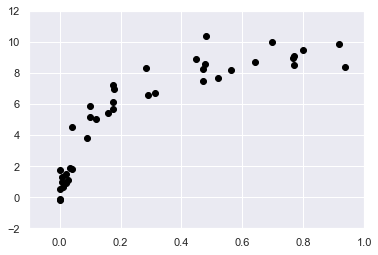

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting

plt.scatter(X.ravel(), 
            y, 
            color = 'black'
           )
axis = plt.axis()

plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)

####  <span style = "color:red">Código Original.</span>
<!---
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting

plt.scatter(X.ravel(), y, color = 'black')
axis = plt.axis()

plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
-->



##### Agora podemos visualizar nossos dados, juntamente com ajustes de modelo polinomial de vários graus. use a função [`np.linspace`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) para criar um objeto de teste com intervalo (-0.1, 1.1, 500) e a função [`reshape`](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html) para inverter o formato do objeto de saída.

#### Você pode pensar em um `loop for` para poder gerar um gráfico com curvas de vários graus de polinômios, teste os graus (1, 3, 5).

#### você pode criar um objeto que armazene os valores da variável dependente que pretende usar com as funções [`.fit()`](https://scikit-learn.org/stable/tutorial/basic/tutorial.html) e [`.predict()`](https://kite.com/python/docs/sklearn.linear_model.stochastic_gradient.BaseSGDRegressor.predict).

#### Não esqueça de aplicar a função [`.plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) para gerar o gráfico de saída.

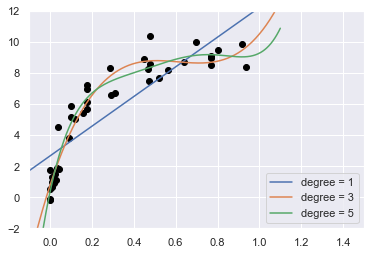

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting

X_test = np.linspace(-0.1, 1.1, 500).reshape(-1,1)

plt.scatter(X.ravel(), 
            y, 
            color = 'black'
           )
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), 
             y_test, 
             label = 'degree = {0}'.format(degree)
            )
plt.xlim(-0.1, 1.5)
plt.ylim(-2, 12)
plt.legend(loc = 'best');

####  <span style = "color:red">Código Original.</span>

<!---
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting

X_test = np.linspace(-0.1, 1.1, 500).reshape(-1,1)

plt.scatter(X.ravel(), y, color = 'black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label = 'degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');
-->






#### O grau do polinômio controla a complexidade do modelo, que pode ser qualquer número inteiro não negativo.

#### Uma pergunta interessante a ser feita: Qual o grau de polinômio fornece um compromisso apropriado entre o viés (ajuste insuficiente) e a variação (ajuste excessivo)?

#### Para entender isso importe a classe de funções [`sklearn.model_selection validation_curve`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html) para validação e escolha do modelo mais conveniente para a descrição dos dados.


#### Use a função [`.np.arange()`](https://numpy.org/doc/stable/reference/generated/numpy.arange.html) para criar um objeto que armazene um número $(0, 21)$ de graus, a serem utilizados como o parâmetro de intervalo na função de validação [`validation_curve()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html) para determine as pontuações de treinamento e teste para valores variáveis de parâmetros.


#### Por fim plote as curvas encontrada e faça interprete do gráfico [`.plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) dos valores dos graus gerados e da média dos valores de validação para cada grau abordado

#### A função [`validation_curve()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html) fornecida pelo [Scikit-Learn](https://towardsdatascience.com/cross-validation-c4fae714f1c5), calculará automaticamente as pontuações de treinamento e validação em todo o intervalo, dado um modelo, um conjunto de dados, um nome de parâmetro e um intervalo a explorar. 

/Users/rudineycasali/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass param_name=polynomialfeatures__degree as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


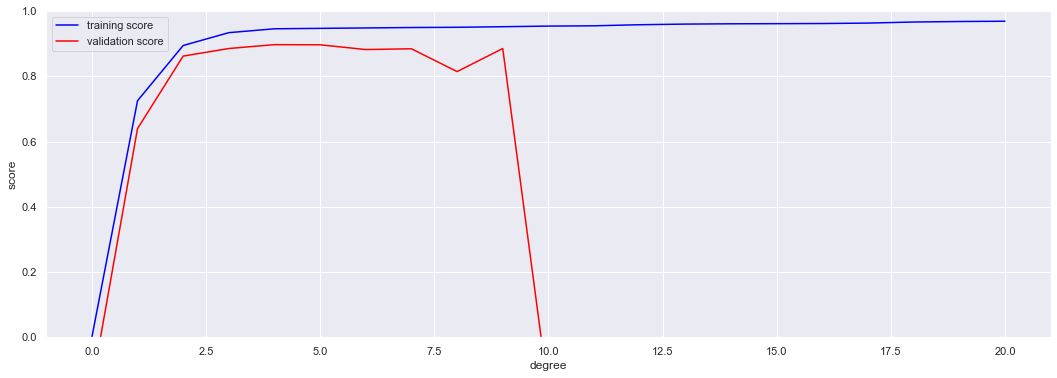

In [10]:
from sklearn.model_selection import validation_curve

degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), 
                                          X, 
                                          y, 
                                          'polynomialfeatures__degree', 
                                          param_range = degree, 
                                          cv = 7
                                         )
plt.figure( figsize = (18, 6))
plt.plot(degree, 
         np.mean(train_score, axis = 1), 
         color = 'blue', 
         label = 'training score'
        )
plt.plot(degree, 
         np.mean(val_score, axis = 1), 
         color = 'red', 
         label = 'validation score'
        )
plt.legend(loc = 'best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

#### A partir da curva de validação, podemos interpretar que o comprometimento ideal entre viés e variância é encontrado com um polinômio de terceira ordem.

####  <span style = "color:red">Código Original.</span>
<!---
from sklearn.model_selection import validation_curve

degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), 
                                          X, 
                                          y, 
                                          'polynomialfeatures__degree', 
                                          param_range = degree, 
                                          cv = 7
                                         )

plt.plot(degree, np.mean(train_score, axis = 1), color = 'blue', label = 'training score')
plt.plot(degree, np.mean(val_score, axis = 1), color = 'red', label = 'validation score')
plt.legend(loc = 'best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

#### A partir da curva de validação, podemos interpretar que o comprometimento ideal entre viés e variância é encontrado com um polinômio de terceira ordem.
-->


#### Este gráfico mostra precisamente o comportamento qualitativo que esperamos: a pontuação do treinamento é sempre maior que a pontuação da validação; a pontuação do treinamento cresce monótonamente junto com a complexidade do modelo; e a pontuação de validação atinge o pico antes de finalmente cair à medida que o modelo se adapta demais.

#### A partir da curva de validação, podemos interpretar que o comprometimento ideal entre viés e variância é encontrado com um polinômio de terceira ordem; Podemos calcular e exibir esse ajuste nos dados originais:

#### Podemos calcular e exibir esse ajuste nos dados originais.

#### Observe que o modelo escolhido com base nos dados do treino / validação agora é treinado em $100\%$ dos dados de treino / validação e é testado com observações nunca usadas para treinar ou validar. Nesse caso, não houve a divisão treino / validação e teste porque geramos o `X` teste separadamente.


#### Plot a dispersão do modelo escolhido com a função  [`.plt.scatter()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html) e aplique a função polinomial [`PolynomialRegression()`](https://towardsdatascience.com/machine-learning-polynomial-regression-with-python-5328e4e8a386) para verificar o resultado do fit e da previsão dos resultados.

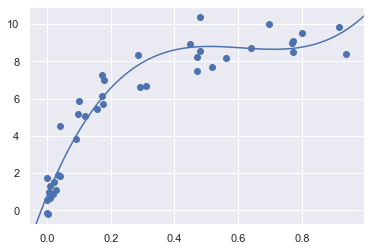

In [11]:
plt.scatter(X.ravel(), 
            y
           )
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), 
         y_test
        )
plt.axis(lim);

####  <span style = "color:red">Código Original.</span>
<!---
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test)
plt.axis(lim);
-->

##  <span style = "color:blue">Prátic Independente.</span>
<!---

[``]()

-->


In [192]:
import numpy as np
import math

def make_data(N, err = 0.5, rseed = 42):
    '''
    randomly sample the data 
    '''    
    rng = np.random.RandomState(rseed)
    X = math.sin(N ** 2 / 2) * math.exp(- 2 * N) * rng.rand(N, 1) ** (1/2) + rng.rand(N, 1) ** 5
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

#### Considerando a função geradora de pontos aleatórios acima, crie uma distribuição de $150$ pontos, com um ruído de $0.5$. 

####  <span style = "color:red">Código Original.</span>
<!---
X, y = make_data(150, err = 0.5, rseed = 42)
#print(X)
#print(X.ravel())
#print(y)
-->

#### Plote os pontos gerados em um gráfico de dispersão. 

####  <span style = "color:red">Código Original.</span>
<!---
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting

plt.scatter(X.ravel(), 
            y, 
            color = 'black'
           )
axis = plt.axis()

plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
-->

#### Use uma regressão polinomial para gerar curvas de diferentes graus e estude seu ajuste aos pontos.

####  <span style = "color:red">Código Original.</span>
<!---
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting

X_test = np.linspace(-0.1, 1.1, 500).reshape(-1,1)

plt.scatter(X.ravel(), 
            y, 
            color = 'black'
           )
axis = plt.axis()
for degree in [1, 2, 3, 4]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), 
             y_test, 
             label = 'degree = {}'.format(degree)
            )
plt.xlim(-0.2, 1.2)
plt.ylim(-5, 15)
plt.legend(loc = 'best');
-->

#### Plote a curva de validação treino/validação para $10$ dobras de validação cruzada, com um intervalo unitário para distribuição de graus.

####  <span style = "color:red">Código Original.</span>
<!---
from sklearn.model_selection import validation_curve

degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), 
                                          X, 
                                          y, 
                                          'polynomialfeatures__degree', 
                                          param_range = degree, 
                                          cv = 10
                                         )
#print('degree:', degree, 'val_score:', val_score)
plt.figure( figsize = (18, 6))
plt.plot(degree, 
         np.mean(train_score, axis = 1), 
         color = 'blue', 
         label = 'training score'
        )
plt.plot(degree, 
         np.mean(val_score, axis = 1), 
         color = 'red', 
         label = 'validation score'
        )
plt.legend(loc = 'best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score')
plt.xticks(np.arange(0, degree[-1], 
                     step = 1.0
                    )
          );
-->

#### Plote a curva com o grau polinomial que melhor se ajusta aos pontos.

####  <span style = "color:red">Código Original.</span>
<!---
plt.scatter(X.ravel(), 
            y
           )
lim = plt.axis()
y_test4 = PolynomialRegression(4).fit(X, y).predict(X_test)

plt.plot(X_test.ravel(), 
         y_test4
        )
plt.axis(lim);
-->